In [1]:
import ai.condense2
import gensim
import sklearn.cluster
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

We can first load the data, uncomment out the one you want

In [ ]:
df = ai.condense2.loadNewsGroups()
#df = ai.condense2.loadSenateLarge()
#df = ai.condense2.loadSenateSmall()
#df = ai.condense2.loadNatregimes()

We then select a clustering alorithim, the complete list is [here](http://scikit-learn.org/stable/modules/clustering.html). The one we are using is very general and tends to work OK for most data, if you get the number of clusters correct.

In [ ]:
numCategories = len(set(df['category']))
clf = sklearn.cluster.KMeans(n_clusters=numCategories, init='k-means++')
clf.fit(np.stack(df['vect'], axis=1)[0])

We can get a few stats about how well the technique worked, look [here](http://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation) for more discusion.

In [ ]:
ai.condense2.clusteringMetrics(clf, df)

We can also project the data into 2 dimensions and plot it, there are a few issues with this though:

1. The projection loses most of the information, just because things look far apart once projected, doens't mean they are in the original space
2. The cluster dection algorthims don't give names to the clusters so linking know clusters to the model's clusters can be tricky

In [ ]:
ai.condense2.visulizeClusters(clf, df)

If we want to do word2vec we have to use either the senate data, or the pre trained NYT or resume data.

In [2]:
df = ai.condense2.loadSenateSmall()

Loading senate data
Converting to vectors


You can load the NYT data by uncommenting the third line

In [3]:
w2v = gensim.models.word2vec.Word2Vec(df['normalized_sents'].sum())
#w2v = ai.condense2.loadResumeModel()
#w2v = ai.condense2.loadNYTmodel()

Now we can look at a few things that come from the word vectors. The first is to
find similar vectors (cosine similarity):

In [4]:
w2v.most_similar('president')

[('presidents', 0.8811174631118774),
 ('administration', 0.872096598148346),
 ('took', 0.8280513286590576),
 ('signature', 0.8272181153297424),
 ('bushs', 0.8144505023956299),
 ('bush', 0.8031109571456909),
 ('republican', 0.8001353740692139),
 ('vice', 0.7848461866378784),
 ('veto', 0.7817424535751343),
 ('blank', 0.7790645360946655)]

In [5]:
w2v.most_similar('war')

[('troops', 0.9349091649055481),
 ('afghanistan', 0.9262569546699524),
 ('iraq', 0.9214016199111938),
 ('misguided', 0.8960864543914795),
 ('end', 0.8957632780075073),
 ('violence', 0.8885310888290405),
 ('stabilize', 0.8854610919952393),
 ('qaeda', 0.8801956176757812),
 ('escalation', 0.8781583905220032),
 ('soldiers', 0.876348078250885)]

Find which word least matches the others within a word set (cosine similarity):

In [6]:
w2v.doesnt_match(['administration', 'administrations', 'presidents', 'president', 'washington'])

'washington'

Find which word best matches the result of a semantic *equation* (here, we seek
the words whose vectors best fit the missing entry from the equation: **X + Y -
Z = _**.

In [7]:
w2v.most_similar(positive=['clinton', 'republican'], negative = ['democrat'])

[('lyndon', 0.946916937828064),
 ('rubber', 0.9195495843887329),
 ('signature', 0.9128718376159668),
 ('election', 0.9119610786437988),
 ('eisenhower', 0.9105719327926636),
 ('bushs', 0.906384289264679),
 ('endorse', 0.9059366583824158),
 ('unilateral', 0.9024959802627563),
 ('inaugural', 0.9019466638565063),
 ('message', 0.9017425775527954)]

We can plot the data in projected space, but the same issues exists as  with the clusters around projections

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


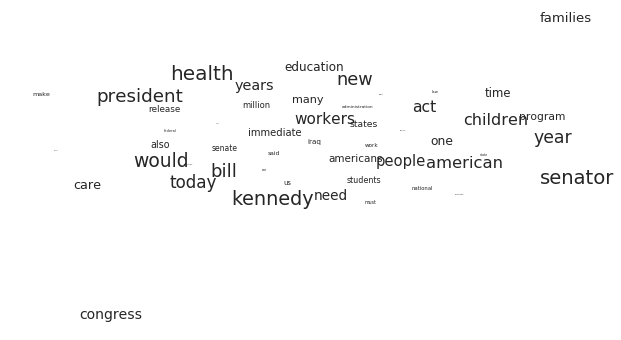

In [8]:
ai.condense2.plotWord2Vec(w2v)

Instead of projecting onto PCA space we can instead project onto out own dimensions. This requires some care so we have done it only for the NYT data. You can change this code but the corpus is small enough that words need to be selected carefully.

In [9]:
w2v = ai.condense2.loadNYTmodel()
dimensions = {
    'Gender' : ai.condense2.dimension(w2v, ['man','him','he'], ['woman', 'her', 'she']),
    'Race' : ai.condense2.dimension(w2v, ['black','blacks','African'], ['white', 'whites', 'Caucasian']),
    'Class' : ai.condense2.dimension(w2v, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive']),
}

words = {
    'Occupations' : ["doctor","lawyer","plumber","scientist","hairdresser", "nanny","carpenter","entrepreneur","musician","writer", "banker","poet","nurse"],
    'Foods' : ["steak", "bacon", "croissant", "cheesecake", "salad", "cheeseburger", "vegetables", "beer", "wine", "pastry"],
    'Sports'  : ["basketball", "baseball", "boxing", "softball", "volleyball", "tennis", "golf", "hockey", "soccer"],
}

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


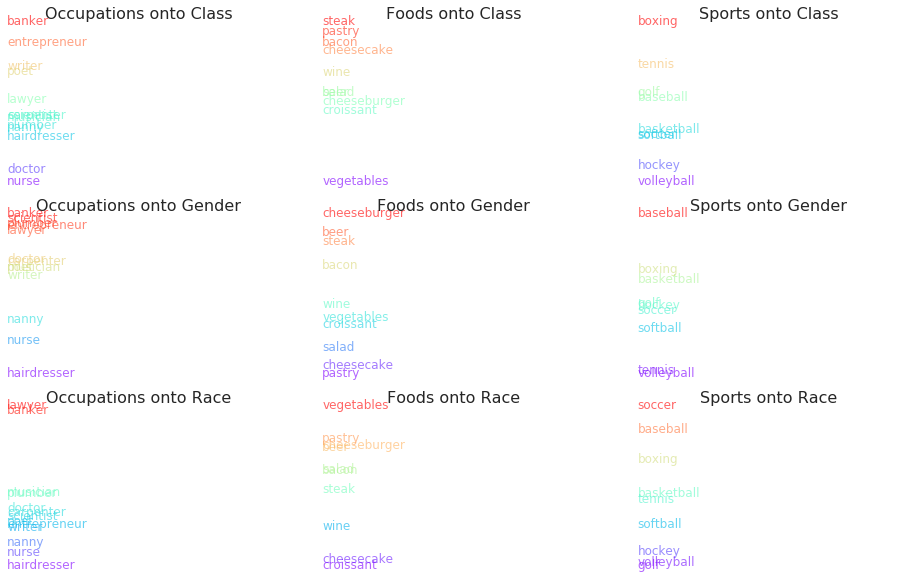

In [10]:
ai.condense2.makeNYTplots(w2v, dimensions, words)